<a href="https://colab.research.google.com/github/div-yansh/Sign-Language/blob/master/sign_language.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from google.colab import files
%matplotlib inline

tf.__version__

'2.2.0'

In [ ]:
!pip install kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"divyansh7890","key":"9f5326acd4ee982fa12444d32a5e1c5e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d datamunge/sign-language-mnist

 99% 62.0M/62.6M [00:02<00:00, 24.7MB/s]
100% 62.6M/62.6M [00:02<00:00, 31.0MB/s]


In [ ]:
!unzip sign-language-mnist.zip

Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [ ]:
!ls

american_sign_language.PNG  sample_data		     sign_mnist_train
amer_sign2.png		    sign-language-mnist.zip  sign_mnist_train.csv
amer_sign3.png		    sign_mnist_test
kaggle.json		    sign_mnist_test.csv


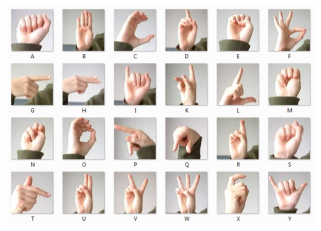

In [ ]:
img = mpimg.imread("amer_sign2.png")
plt.imshow(img)
plt.axis('Off')
plt.show()

In [ ]:
base = os.getcwd()
train_path = os.path.join(base, "sign_mnist_train")
test_path = os.path.join(base, "sign_mnist_test")

os.chdir(train_path)
df_train = pd.read_csv("sign_mnist_train.csv")
os.chdir(test_path)
df_test = pd.read_csv("sign_mnist_test.csv")
os.chdir(base)

In [ ]:
df_train.shape, df_test.shape

((27455, 785), (7172, 785))

In [ ]:
df_train["label"].unique()

array([ 3,  6,  2, 13, 16,  8, 22, 18, 10, 20, 17, 19, 21, 23, 24,  1, 12,
       11, 15,  4,  0,  5,  7, 14])

In [ ]:
label_to_alphabet = {}

for i in range(26):
    label_to_alphabet[i] = chr(ord('A')+i)
label_to_alphabet

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 9: 'J',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y',
 25: 'Z'}

In [ ]:
def generate_image(index, df):
    img = df.iloc[index, 1:]
    img = img.to_numpy()
    img = img.reshape(28, 28).astype('float32')
    return img

In [ ]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
df_train.shape

(27455, 785)

In [ ]:
train_images = []
train_labels = []
for i in range(df_train.shape[0]):
    train_images.append(generate_image(i, df_train))
    train_labels.append(df_train.iloc[i, 0])
                        
train_images = np.array(train_images)
train_labels = np.array(train_labels)
train_images = np.expand_dims(train_images, axis=3)
validation_images, validation_labels = train_images[27000: ], train_labels[27000: ]
train_images.shape, train_labels.shape, validation_images.shape, validation_labels.shape

((27455, 28, 28, 1), (27455,), (455, 28, 28, 1), (455,))

In [ ]:
test_images = []
test_labels = []
for i in range(df_test.shape[0]):
    test_images.append(generate_image(i, df_test))
    test_labels.append(df_test.iloc[i, 0])
                        
test_images = np.array(test_images)
test_labels = np.array(test_labels)
test_images = np.expand_dims(test_images, axis=3)
test_images.shape, test_labels.shape

((7172, 28, 28, 1), (7172,))

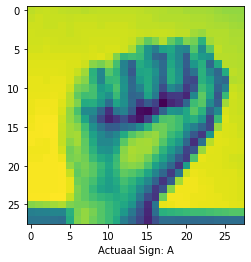

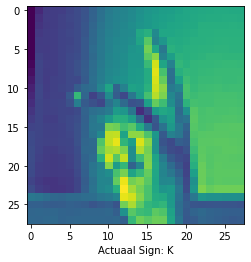

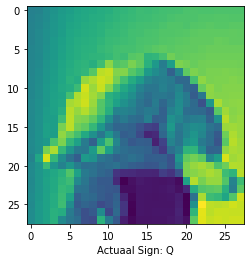

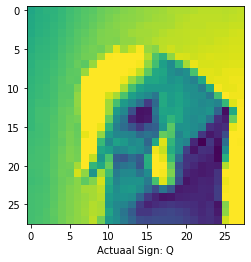

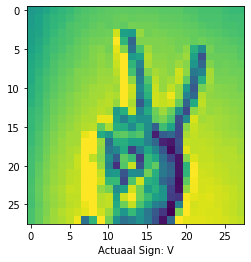

In [ ]:
rand_img = random.sample(range(1, 100), 5)
for i in rand_img:
    img = generate_image(i, df_train)
    label = df_train.iloc[i, 0]
    plt.imshow(img)
    plt.xlabel("Actuaal Sign: " + label_to_alphabet[label])
    plt.show()

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   zoom_range = 0.2, 
                                   shear_range = 0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
model = keras.models.Sequential([
        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)), 
        keras.layers.MaxPooling2D(2,2), 
        keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)), 
        keras.layers.MaxPooling2D(2, 2), 
        keras.layers.Flatten(), 
        keras.layers.Dense(128, activation='relu'), 
        keras.layers.Dense(26, activation='softmax')
        ])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               204928    
_________________________________________________________________
dense_7 (Dense)              (None, 26)               

In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

history = model.fit(train_datagen.flow(train_images, train_labels, batch_size=32), 
                    steps_per_epoch=len(train_images)/32, 
                    epochs=15, 
                    validation_data=validation_datagen.flow(validation_images, validation_labels, batch_size=32), 
                    validation_steps=len(validation_images)/ 32)

Epoch 1/15
858/857 [==============================] - 14s 16ms/step - loss: 2.8239 - acc: 0.1484 - val_loss: 1.9665 - val_acc: 0.3912
Epoch 2/15
858/857 [==============================] - 14s 16ms/step - loss: 2.0946 - acc: 0.3417 - val_loss: 1.1896 - val_acc: 0.6396
Epoch 3/15
858/857 [==============================] - 14s 16ms/step - loss: 1.6986 - acc: 0.4590 - val_loss: 0.9541 - val_acc: 0.7033
Epoch 4/15
858/857 [==============================] - 14s 17ms/step - loss: 1.4650 - acc: 0.5263 - val_loss: 0.8600 - val_acc: 0.7077
Epoch 5/15
858/857 [==============================] - 14s 17ms/step - loss: 1.3095 - acc: 0.5711 - val_loss: 0.6062 - val_acc: 0.8088
Epoch 6/15
858/857 [==============================] - 14s 17ms/step - loss: 1.1734 - acc: 0.6129 - val_loss: 0.5382 - val_acc: 0.8132
Epoch 7/15
858/857 [==============================] - 14s 16ms/step - loss: 1.0900 - acc: 0.6424 - val_loss: 0.4871 - val_acc: 0.8308
Epoch 8/15
858/857 [==============================] - 14s 16ms

In [ ]:
model.evaluate(test_images, test_labels)

225/225 [==============================] - 1s 4ms/step - loss: 212.9618 - acc: 0.6364


[212.96177673339844, 0.6363636255264282]

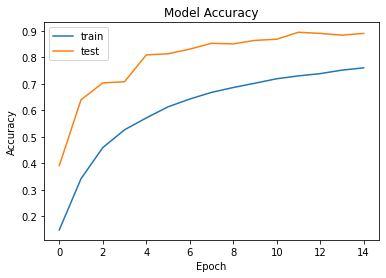

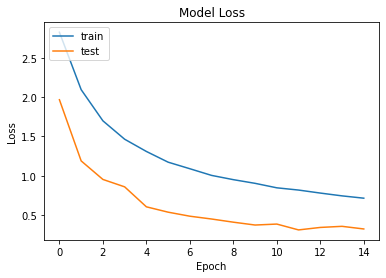

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

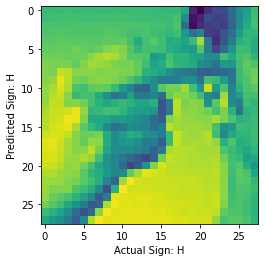

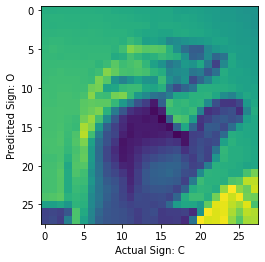

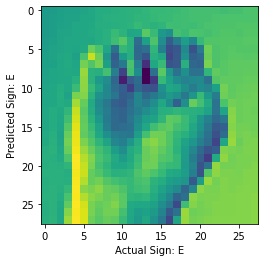

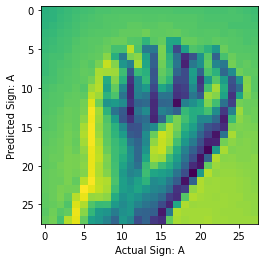

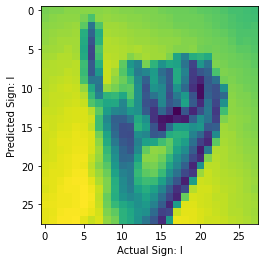

In [ ]:
rand_img = random.sample(range(1, 100), 5)

for i in rand_img:
    img = generate_image(i, df_test)
    label = df_test.iloc[i, 0]
    plt.imshow(img)
    img = np.array([img])
    img = np.expand_dims(img, axis=3)
    prediction = np.argmax(model.predict(img))
    plt.xlabel("Actual Sign: " + label_to_alphabet[label])
    plt.ylabel("Predicted Sign: " + label_to_alphabet[prediction])
    plt.show()

In [ ]:
model.save("sign_language_model.h5")

In [ ]:
files.download("sign_language_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>